IMT 575 C - Group Project - TradeX

Twitter Sentiment 

In [54]:
import requests
import tweepy as tw
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import pandas as pd
import json
import datetime
import time
import csv
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
twet_amz = pd.read_csv('AMZN_Comp.csv')
twet_fb = pd.read_csv('FB_Comp.csv')
twet_apl = pd.read_csv('AAPL_Comp.csv')

C:\Users\natal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
twet_amz['hashtag'] = '$AMZN'
twet_fb['hashtag'] = '$FB'
twet_apl['hashtag'] = '$AAPL'

In [4]:
twit_data = pd.concat([twet_amz, twet_fb, twet_apl], axis=0)

In [5]:
twit_data.rename(columns = {'created_at':'date'}, inplace = True)

In [6]:
twit_data.rename(columns = {'reshares':'retweets'}, inplace = True)

In [7]:
twit_data['date'] = twit_data['date'].str.replace('T',' ')

In [8]:
twit_data['date'] = twit_data['date'].str.replace('Z',' ')

In [9]:
df = twit_data.drop('user', inplace=True, axis=1)

In [10]:
df = twit_data.drop('source', inplace=True, axis=1)

In [11]:
df = twit_data.drop('mentioned_users', inplace=True, axis=1)

In [12]:
df = twit_data.drop('entities', inplace=True, axis=1)

In [13]:
df = twit_data.drop('id', inplace=True, axis=1)

In [14]:
df = twit_data.drop('conversation', inplace=True, axis=1)

In [15]:
df = twit_data.drop('links', inplace=True, axis=1)

In [16]:
df = twit_data.drop('reshare_message', inplace=True, axis=1)

In [17]:
df = twit_data.drop('owned_symbols', inplace=True, axis=1)

In [18]:
df = twit_data.drop('Unnamed: 11', inplace=True, axis=1)

In [19]:
df = twit_data.drop('symbols', inplace=True, axis=1)

In [20]:
df = twit_data.drop('Unnamed: 0.1', inplace=True, axis=1)
df = twit_data.drop('Unnamed: 0', inplace=True, axis=1)

In [21]:
twit_data['likes'] = twit_data['likes'].fillna(0)
twit_data['retweets'] = twit_data['retweets'].fillna(0)

In [22]:
twit_data['score'] = twit_data['body'].apply(lambda review: sid.polarity_scores(review))

twit_data.head()

,body,date,likes,retweets,hashtag,score
0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN,"{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp..."
4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN,"{'neg': 0.302, 'neu': 0.476, 'pos': 0.222, 'co..."


In [23]:
twit_data['compound']  = twit_data['score'].apply(lambda score_dict: score_dict['compound'])

twit_data.head()

,body,date,likes,retweets,hashtag,score,compound
0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN,"{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp...",-0.5106
4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN,"{'neg': 0.302, 'neu': 0.476, 'pos': 0.222, 'co...",-0.2500


In [24]:
        twit_data['Weights'] = twit_data.apply(lambda row: (0.01
                                          if row['likes'] == 0 and row['retweets'] == 0
                                          else (int(row['likes'])+int(row['retweets']))*10
                                                     ), axis=1)
        twit_data['Total_Weighted_Score'] = twit_data.apply(lambda row: (row['compound']* row['Weights']),
        axis=1)

In [25]:
twit_data.to_csv('Twit3_data.csv')

Now, I will analyze all five FAANG stocks with May 2022 data. 

In [26]:
twm_1 = pd.read_csv("AAPL_May22.csv").astype(str)
twm_2 = pd.read_csv("AMZN_May22.csv").astype(str)
twm_4 = pd.read_csv("NFLX_May22.csv").astype(str)
twm_5 = pd.read_csv("GOOG_May22.csv").astype(str)
tmw_3 = pd.read_csv("FB_May22.csv").astype(str)

In [27]:
twm_2['Hashtag'] = '$AMZN'
tmw_3['Hashtag'] = '$FB'
twm_1['Hashtag'] = '$AAPL'
twm_4['Hashtag'] = '$NFLX'
twm_5['Hashtag'] = '$GOOG'

In [28]:
twm_sent = pd.concat([twm_1, twm_2, tmw_3, twm_4, twm_5])

In [29]:
tw_1 = pd.read_csv("AAPL.csv").astype(str)
tw_2 = pd.read_csv("AMZN.csv").astype(str)
tw_4 = pd.read_csv("NFLX.csv").astype(str)
tw_5 = pd.read_csv("GOOG.csv").astype(str)
tw_3 = pd.read_csv("FB.csv").astype(str)

In [30]:
tw_sent = pd.concat([tw_1, tw_2, tw_3, tw_4, tw_5], axis=0)

In [31]:
tw_sent = pd.concat([tw_sent, twm_sent], axis=0)
tw_sent

,date,Hashtag,Content,Content,Unnamed: 3
0,5/9/2022 21:25,$AAPL,b'$TSLA to 650 by Thursday. \n$TWTR to 42 by F...,NaN,NaN
1,5/9/2022 21:24,$AAPL,b'Count of mentions for the tickers in last 1 ...,NaN,NaN
2,5/9/2022 21:24,$AAPL,b'@huntdividends $AAPL $MSFT $V \n\n1 share ea...,NaN,NaN
3,5/9/2022 21:24,$AAPL,b'@davidgandler bravo. So proud that you sold ...,NaN,NaN
4,5/9/2022 21:23,$AAPL,b'RT @MoMo_A1Trader: So biggest money maker wa...,NaN,NaN
...,...,...,...,...,...
4258,5/19/2022 20:37,$GOOG,b'$GOOG #GOOG A ton of gaps below as this brea...,NaN,NaN
4259,5/19/2022 12:55,$GOOG,b'2022 Returns\n$TWTR: -15%\n$AAPL: -20%\n$GOO...,NaN,NaN
4260,5/17/2022 12:20,$GOOG,b'The Bill &amp; Melinda Gates Foundation sold...,NaN,NaN
4261,5/18/2022 17:21,$GOOG,b'Car accident deaths reach an all time high w...,NaN,NaN


In [32]:
df = tw_sent.drop('Unnamed: 3', inplace=True, axis=1)

In [33]:
from unidecode import unidecode

In [34]:
tw_sent['Content'] = tw_sent['Content'].astype(str)
tw_sent['Content'] = tw_sent['Content'].apply(unidecode)

In [35]:
tw_sent['score'] = tw_sent['Content'].apply(lambda review: sid.polarity_scores(review))
tw_sent['compound']  = tw_sent['score'].apply(lambda score_dict: score_dict['compound'])
tw_sent

,date,Hashtag,Content,Content,score,compound
0,5/9/2022 21:25,$AAPL,b'$TSLA to 650 by Thursday. \n$TWTR to 42 by F...,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,5/9/2022 21:24,$AAPL,b'Count of mentions for the tickers in last 1 ...,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,5/9/2022 21:24,$AAPL,b'@huntdividends $AAPL $MSFT $V \n\n1 share ea...,NaN,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.2960
3,5/9/2022 21:24,$AAPL,b'@davidgandler bravo. So proud that you sold ...,NaN,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...",0.6361
4,5/9/2022 21:23,$AAPL,b'RT @MoMo_A1Trader: So biggest money maker wa...,NaN,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...",0.5081
...,...,...,...,...,...,...
4258,5/19/2022 20:37,$GOOG,b'$GOOG #GOOG A ton of gaps below as this brea...,NaN,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.2023
4259,5/19/2022 12:55,$GOOG,b'2022 Returns\n$TWTR: -15%\n$AAPL: -20%\n$GOO...,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4260,5/17/2022 12:20,$GOOG,b'The Bill &amp; Melinda Gates Foundation sold...,NaN,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.2960
4261,5/18/2022 17:21,$GOOG,b'Car accident deaths reach an all time high w...,NaN,"{'neg': 0.12, 'neu': 0.734, 'pos': 0.147, 'com...",-0.0772


In [36]:
tw_sent.to_csv('twit_may.csv')

In [37]:
twitO = pd.read_csv('Twit3_data.csv')
twitM = pd.read_csv('twit_may.csv')

In [38]:
twitM.rename(columns = {'Content':'Text'}, inplace = True)
twitO.rename(columns = {'body':'Text'}, inplace = True)
twitO.rename(columns = {'hashtag':'Hashtag'}, inplace = True)

In [39]:
twitter = pd.concat([twitO, twitM], axis=0)

In [40]:
twitter['likes'] = twitter['likes'].fillna(0)
twitter['retweets'] = twitter['retweets'].fillna(0)
twitter['Weights'] = twitter['Weights'].fillna(0)
twitter['Total_Weighted_Score'] = twitter['Total_Weighted_Score'].fillna(0)

In [41]:
twitter

,Unnamed: 0,Text,date,likes,retweets,Hashtag,score,compound,Weights,Total_Weighted_Score,Content
0,0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.01,0.000,NaN
1,1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,100.00,0.000,NaN
2,2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.01,0.000,NaN
3,3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN,"{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp...",-0.5106,20.00,-10.212,NaN
4,4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN,"{'neg': 0.302, 'neu': 0.476, 'pos': 0.222, 'co...",-0.2500,20.00,-5.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
51047,4258,b'$GOOG #GOOG A ton of gaps below as this brea...,5/19/2022 20:37,0.0,0.0,$GOOG,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.2023,0.00,0.000,NaN
51048,4259,b'2022 Returns\n$TWTR: -15%\n$AAPL: -20%\n$GOO...,5/19/2022 12:55,0.0,0.0,$GOOG,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.00,0.000,NaN
51049,4260,b'The Bill &amp; Melinda Gates Foundation sold...,5/17/2022 12:20,0.0,0.0,$GOOG,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.2960,0.00,0.000,NaN
51050,4261,b'Car accident deaths reach an all time high w...,5/18/2022 17:21,0.0,0.0,$GOOG,"{'neg': 0.12, 'neu': 0.734, 'pos': 0.147, 'com...",-0.0772,0.00,0.000,NaN


In [42]:
twitter.to_csv("Twitter_Data.csv")

Exploratory Data Analysis

In [43]:
TwitM = pd.read_csv('Twit_may.csv')
TwitO = pd.read_csv('Twit3_data.csv')
Twitt = pd.read_csv('Twitter_Data.csv')

C:\Users\natal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
TwitM[["date"]] = TwitM[["date"]].apply(pd.to_datetime)
TwitO[["date"]] = TwitO[["date"]].apply(pd.to_datetime)
Twitt[["date"]] = Twitt[["date"]].apply(pd.to_datetime)

In [45]:
TwitM.rename(columns = {'Content':'Text'}, inplace = True)

In [46]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    TwitO['body'] = TwitO['body'].str.replace(char, ' ')

C:\Users\natal\AppData\Local\Temp/ipykernel_16640/139652730.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TwitO['body'] = TwitO['body'].str.replace(char, ' ')


In [47]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    TwitM['Text'] = TwitM['Text'].str.replace(char, ' ')

C:\Users\natal\AppData\Local\Temp/ipykernel_16640/28302213.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TwitM['Text'] = TwitM['Text'].str.replace(char, ' ')


In [48]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    Twitt['Text'] = Twitt['Text'].str.replace(char, ' ')

C:\Users\natal\AppData\Local\Temp/ipykernel_16640/59847345.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Twitt['Text'] = Twitt['Text'].str.replace(char, ' ')


In [49]:
stocks = ['$FB','$AMZN','$AAPL','$NFLX','$GOOG']

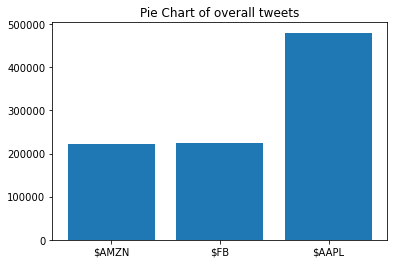

ValueError: 
BHC  11c Over 10.8 | 10.5p Under 10.5\n
                                     ^
Unknown symbol: \n, found '\'  (at char 37), (line:1, col:38)

<Figure size 432x288 with 1 Axes>

ValueError: 
BHC  11c Over 10.8 | 10.5p Under 10.5\n
                                     ^
Unknown symbol: \n, found '\'  (at char 37), (line:1, col:38)

<Figure size 432x288 with 1 Axes>

In [50]:
dfgroup = TwitO.groupby(['hashtag'])['body'].count().reset_index().sort_values(by="body")
plt.title('Pie Chart of overall tweets')
plt.bar(dfgroup["hashtag"],dfgroup["body"])
plt.show()

dfgroup = TwitM.groupby(['Hashtag'])['Text'].count().reset_index().sort_values(by="Text")
plt.title('Pie Chart of overall tweets')
plt.bar(dfgroup["Hashtag"],dfgroup["Text"])
plt.show()

dfgroup = Twitt.groupby(['Hashtag'])['Text'].count().reset_index().sort_values(by="Text")
plt.title('Pie Chart of overall tweets')
plt.bar(dfgroup["Hashtag"],dfgroup["Text"])
plt.show()

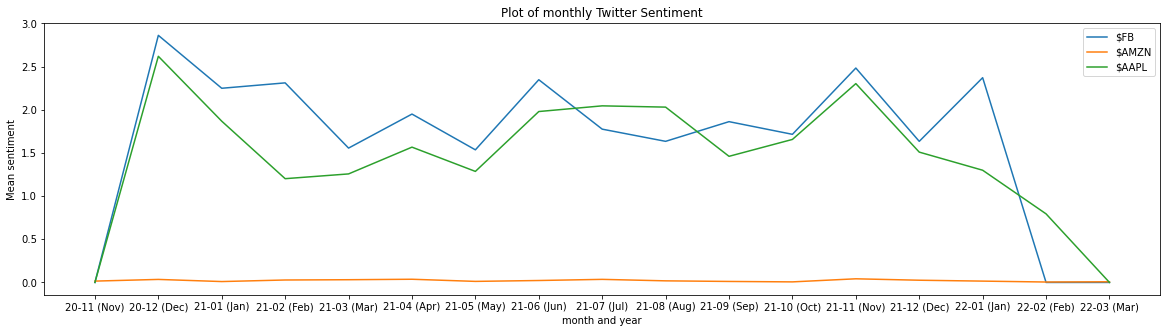

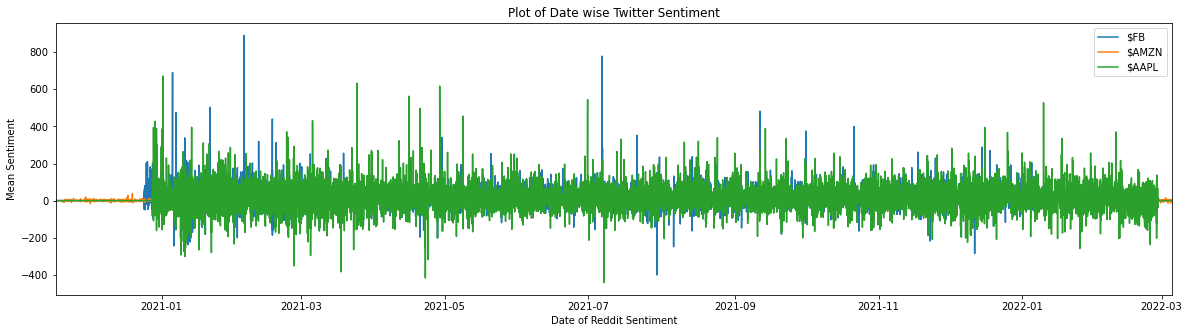

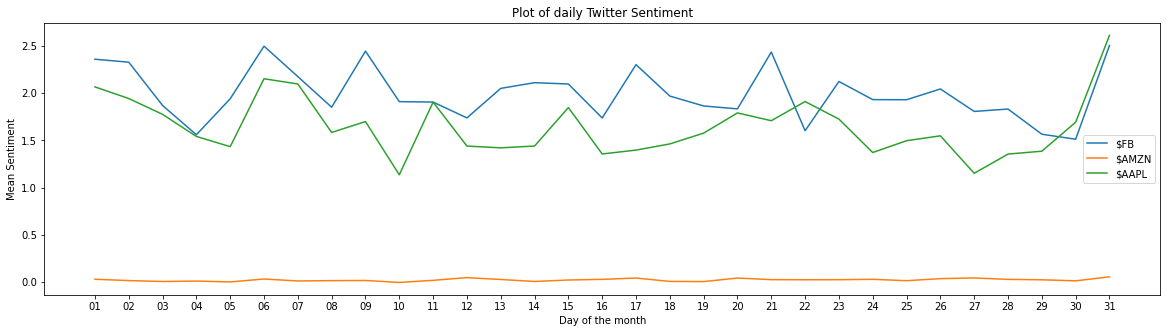

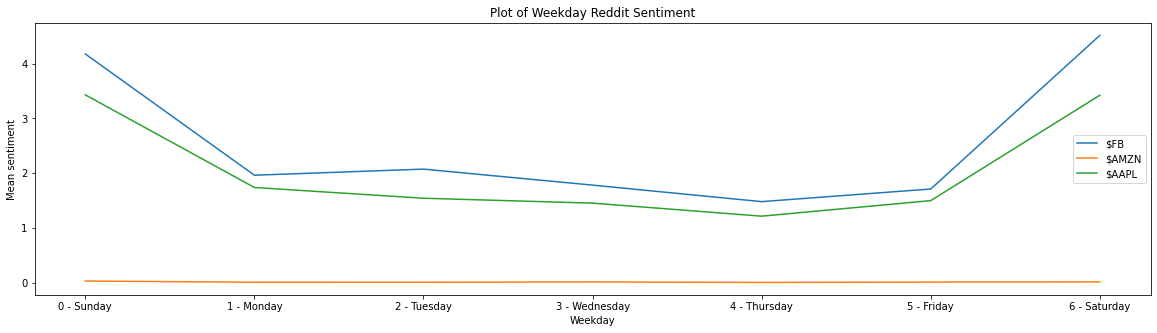

In [51]:
#Plot of monthly Twitter Sentiment
TwitO["month"] = TwitO["date"].dt.strftime('%y-%m (%b)')
dfgroup = TwitO.groupby(['month','hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='month',columns='hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of monthly Twitter Sentiment')
plt.xlabel('month and year')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["month"],dfgroup[TwitO["hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Date wise Twitter Sentiment
dfgroup = TwitO.groupby(['date','hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='date',columns='hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.xlim(min(dfgroup["date"]),max(dfgroup["date"]))
plt.title('Plot of Date wise Twitter Sentiment')
plt.xlabel('Date of Reddit Sentiment')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["date"],dfgroup[TwitO["hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of daily Reddit Sentiment
TwitO["DayOfMonth"] = TwitO["date"].dt.strftime('%d')
dfgroup = TwitO.groupby(['DayOfMonth','hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='DayOfMonth',columns='hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of daily Twitter Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["DayOfMonth"],dfgroup[TwitO["hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Weekday Reddit Sentiment
TwitO["Day"] = TwitO["date"].dt.strftime('%w - %A')
dfgroup = TwitO.groupby(['Day','hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Day',columns='hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of Weekday Reddit Sentiment')
plt.xlabel('Weekday')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["Day"],dfgroup[TwitO["hashtag"].unique()])
plt.legend(stocks)
plt.show()


C:\Users\natal\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


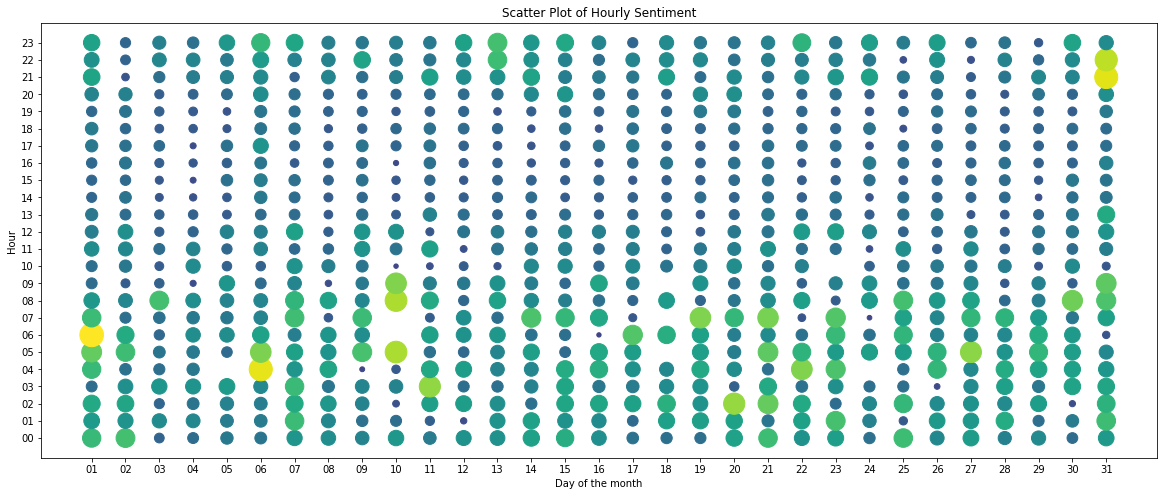

In [52]:
#Scatter Plot of Hourly Sentiment
TwitO["Hour"] = TwitO["date"].dt.strftime('%H')
dfgroup = TwitO.groupby(['DayOfMonth','Hour'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
fig = plt.figure(figsize=(20,8))
plt.title('Scatter Plot of Hourly Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Hour')
plt.scatter(dfgroup["DayOfMonth"],dfgroup["Hour"],s=dfgroup["Total_Weighted_Score"]*100,c=dfgroup["Total_Weighted_Score"])
plt.show()

KeyError: '[nan] not in index'

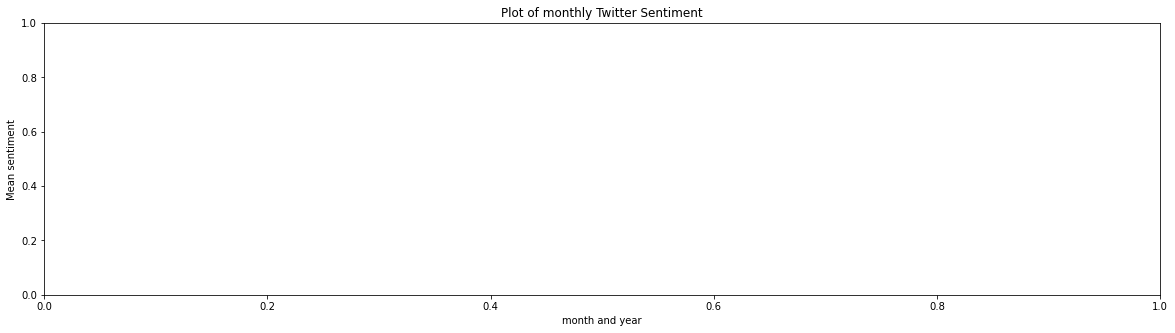

In [53]:
#Plot of monthly Twitter Sentiment
Twitt["month"] = Twitt["date"].dt.strftime('%y-%m (%b)')
dfgroup = Twitt.groupby(['month','Hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='month',columns='Hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of monthly Twitter Sentiment')
plt.xlabel('month and year')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["month"],dfgroup[Twitt["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Date wise Twitter Sentiment
dfgroup = Twitt.groupby(['date','Hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='date',columns='Hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.xlim(min(dfgroup["date"]),max(dfgroup["date"]))
plt.title('Plot of Date wise Twitter Sentiment')
plt.xlabel('Date of Reddit Sentiment')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["date"],dfgroup[Twitt["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of daily Reddit Sentiment
Twitt["DayOfMonth"] = Twitt["date"].dt.strftime('%d')
dfgroup = Twitt.groupby(['DayOfMonth','Hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='DayOfMonth',columns='Hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of daily Twitter Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["DayOfMonth"],dfgroup[Twitt["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Weekday Reddit Sentiment
Twitt["Day"] = Twitt["date"].dt.strftime('%w - %A')
dfgroup = Twitt.groupby(['Day','Hashtag'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Day',columns='Hashtag',values='Total_Weighted_Score')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of Weekday Reddit Sentiment')
plt.xlabel('Weekday')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["Day"],dfgroup[Twitt["Hashtag"].unique()])
plt.legend(stocks)
plt.show()


In [ ]:
#Scatter Plot of Hourly Sentiment
Twitt["Hour"] = Twitt["date"].dt.strftime('%H')
dfgroup = Twitt.groupby(['DayOfMonth','Hour'])['Total_Weighted_Score'].mean().reset_index(name = 'Total_Weighted_Score')
fig = plt.figure(figsize=(20,8))
plt.title('Scatter Plot of Hourly Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Hour')
plt.scatter(dfgroup["DayOfMonth"],dfgroup["Hour"],s=dfgroup["Total_Weighted_Score"]*100,c=dfgroup["Total_Weighted_Score"])
plt.show()

In [ ]:
Twitt.Hashtag.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
TwitO.hashtag.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
TwitM.Hashtag.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
#May 2022 data

#Plot of monthly Twitter Sentiment
Twitt["month"] = Twitt["date"].dt.strftime('%y-%m (%b)')
dfgroup = Twitt.groupby(['month','Hashtag'])['compound'].mean().reset_index(name = 'compound')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='month',columns='Hashtag',values='compound')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of monthly Twitter Sentiment')
plt.xlabel('month and year')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["month"],dfgroup[Twitt["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Date wise Twitter Sentiment
dfgroup = TwitM.groupby(['date','Hashtag'])['compound'].mean().reset_index(name = 'compound')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='date',columns='Hashtag',values='compound')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.xlim(min(dfgroup["date"]),max(dfgroup["date"]))
plt.title('Plot of Date wise Twitter Sentiment')
plt.xlabel('Date of Reddit Sentiment')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["date"],dfgroup[TwitM["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of daily Reddit Sentiment
TwitM["DayOfMonth"] = TwitM["date"].dt.strftime('%d')
dfgroup = TwitM.groupby(['DayOfMonth','Hashtag'])['compound'].mean().reset_index(name = 'compound')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='DayOfMonth',columns='Hashtag',values='compound')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of daily Twitter Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["DayOfMonth"],dfgroup[TwitM["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Weekday Reddit Sentiment
TwitM["Day"] = TwitM["date"].dt.strftime('%w - %A')
dfgroup = TwitM.groupby(['Day','Hashtag'])['compound'].mean().reset_index(name = 'compound')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Day',columns='Hashtag',values='compound')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of Weekday Reddit Sentiment')
plt.xlabel('Weekday')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["Day"],dfgroup[TwitM["Hashtag"].unique()])
plt.legend(stocks)
plt.show()

In [ ]:
#Scatter Plot of Hourly Sentiment May 2022
TwitM["Hour"] = TwitM["date"].dt.strftime('%H')
dfgroup = TwitM.groupby(['DayOfMonth','Hour'])['compound'].mean().reset_index(name = 'compound')
fig = plt.figure(figsize=(20,8))
plt.title('Scatter Plot of Hourly Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Hour')
plt.scatter(dfgroup["DayOfMonth"],dfgroup["Hour"],s=dfgroup["compound"]*100,c=dfgroup["compound"])
plt.show()